<a href="https://colab.research.google.com/github/alinecrb/machine-learning/blob/main/N%C3%ADveis_de_Cinza_e_Binariza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from PIL import Image

# Carregando a imagem desejada
imagem = Image.open('Lenna.png')
imagem = imagem.convert('RGB')  # Garante que está em RGB

# Salvando no formato PPM ASCII (P3)
imagem.save('Lenna.ppm', format='PPM')

In [16]:
import struct  # Biblioteca para manipulação de dados binários

def carregar_ppm(caminho):
    """Carrega uma imagem PPM no formato ASCII (P3)."""

    # Abre o arquivo em modo leitura com codificação latin-1
    with open(caminho, 'r', encoding='latin-1') as f:
        linhas = f.readlines()

    # Remove comentários (linhas que começam com '#')
    linhas = [linha for linha in linhas if not linha.startswith('#')]

    # Verifica se é do tipo P3 (texto)
    assert linhas[0].strip() == 'P3'

    # Lê a largura, altura e valor máximo de cor
    largura, altura = map(int, linhas[1].split())
    max_valor = int(linhas[2])

    # Junta todos os valores numéricos e converte para inteiros
    pixels = list(map(int, ' '.join(linhas[3:]).split()))

    # Reconstrói a imagem como matriz de pixels (tuplas RGB)
    imagem = []
    i = 0
    for _ in range(altura):
        linha = []
        for _ in range(largura):
            r, g, b = pixels[i], pixels[i+1], pixels[i+2]
            linha.append((r, g, b))
            i += 3
        imagem.append(linha)

    return imagem, largura, altura, max_valor

In [17]:
def carregar_ppm_binary(caminho):
    """Carrega uma imagem PPM no formato binário (P6)."""

    # Abre o arquivo em modo binário
    with open(caminho, 'rb') as f:
        header = []
        for _ in range(3):
            # Lê linhas do cabeçalho (tipo, dimensão, valor máximo)
            line = f.readline().decode('latin-1').strip()
            while line.startswith('#') or not line:  # Ignora comentários ou linhas vazias
                line = f.readline().decode('latin-1').strip()
            header.append(line)

        assert header[0] == 'P6'  # Confirma formato binário

        largura, altura = map(int, header[1].split())
        max_valor = int(header[2])

        # Lê os dados binários de pixels
        pixel_data = f.read(largura * altura * 3)

        # Desempacota os dados: transforma binário em inteiros RGB
        pixels = struct.unpack(f'>{largura * altura * 3}B', pixel_data)

    # Reconstrói matriz da imagem
    imagem = []
    i = 0
    for _ in range(altura):
        linha = []
        for _ in range(largura):
            r, g, b = pixels[i], pixels[i+1], pixels[i+2]
            linha.append((r, g, b))
            i += 3
        imagem.append(linha)

    return imagem, largura, altura, max_valor

In [18]:
def salvar_pgm(caminho, imagem_cinza, largura, altura, max_valor=255):
    """Salva uma imagem em escala de cinza no formato binário PGM (P5)."""

    with open(caminho, 'wb') as f:
        # Escreve cabeçalho do PGM
        f.write(f'P5\n'.encode('latin-1'))
        f.write(f'{largura} {altura}\n'.encode('latin-1'))
        f.write(f'{max_valor}\n'.encode('latin-1'))

        # Para cada linha, escreve os pixels binarizados ou em cinza
        for linha in imagem_cinza:
            f.write(struct.pack(f'>{len(linha)}B', *linha))  # Converte lista para binário

In [19]:
def converter_para_cinza(imagem):
    """Converte imagem RGB para tons de cinza com ponderação visual."""

    imagem_cinza = []
    for linha in imagem:
        linha_cinza = []
        for r, g, b in linha:
            # Fórmula perceptual que representa sensibilidade do olho humano
            cinza = int(0.299*r + 0.587*g + 0.114*b)
            linha_cinza.append(cinza)
        imagem_cinza.append(linha_cinza)

    return imagem_cinza

In [20]:
def binarizar(imagem_cinza, limiar=127):
    """Converte imagem em tons de cinza para imagem binária (preto e branco)."""

    binaria = []
    for linha in imagem_cinza:
        linha_bin = [255 if px > limiar else 0 for px in linha]  # Aplica limiar
        binaria.append(linha_bin)

    return binaria

In [21]:
# Carrega a imagem Lenna.ppm no formato binário
imagem, largura, altura, max_valor = carregar_ppm_binary('Lenna.ppm')

# Converte para escala de cinza
imagem_cinza = converter_para_cinza(imagem)

# Aplica binarização
imagem_binaria = binarizar(imagem_cinza)

# Salva imagem em cinza
salvar_pgm('saida_cinza.pgm', imagem_cinza, largura, altura)

# Salva imagem binarizada
salvar_pgm('saida_binaria.pgm', imagem_binaria, largura, altura)

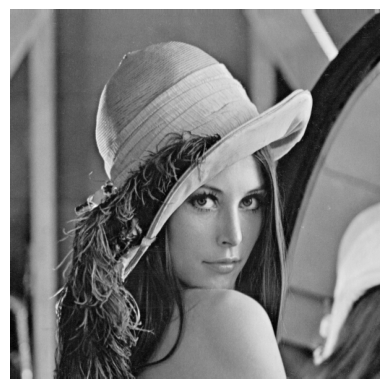

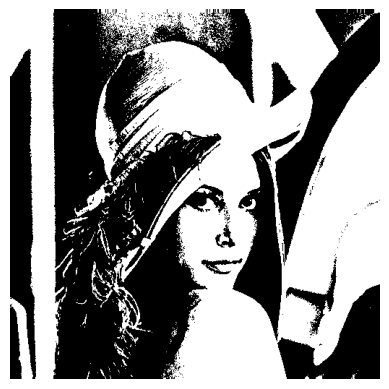

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('saida_cinza.pgm')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

img = mpimg.imread('saida_binaria.pgm')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()